### Beispiel Adaline
Lernen der Trennflächenfunktion des Linearklassifikators mit dem Gradientenverfahren

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions.sda_help as sh

Populating the interactive namespace from numpy and matplotlib


### Dateneingabe 
Daten, Klassenbezeichnungen und Trennflächenparameter eingeben

In [5]:
k = np.array([[1.0, 2.0, 4.0],
             [1.0, 1.0, 0.5],
             [1.0, 0.5, 1.5],
             [1.0, 0.0, 0.5]])
kn = np.array([1, 1, -1, -1])
#w = np.array([-0.3, 1.0, 0.0])

#### Gradientenabstiegsverfahren

[ 0.03   1.065 -0.88 ]
[ 0.048725   1.1144375 -0.7904625]
[ 0.05915075  1.15234194 -0.72350337]
[ 0.06348047  1.18169777 -0.67328292]
[ 0.06334522  1.20471549 -0.63547565]
[ 0.05995229  1.22303234 -0.60687759]
[ 0.05419511  1.23786099 -0.58511543]
[ 0.04673467  1.25009964 -0.56843111]
[ 0.03805982  1.26041357 -0.55552225]
[ 0.0285319   1.26929557 -0.54542397]


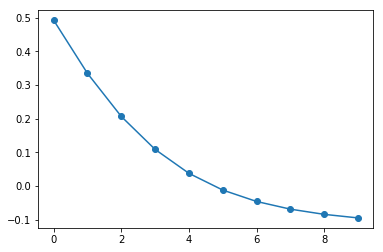

In [6]:
w = np.array([0, 1.0, -1])
eta = 0.01
n_iter = 10
cost = np.zeros(n_iter)
for i in (np.arange(0, n_iter)):
    w = w + eta * np.dot((kn - np.dot(k, w.T)),k)
    print(w)
    cost[i] = ((kn - np.dot(k[:,1:], w[1:].T))**2).sum() / 2.0
plt.plot(np.log10(cost), marker = 'o')
plt.show()

In [7]:
w

array([ 0.0285319 ,  1.26929557, -0.54542397])